In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test binary classifier

In [2]:
test_titanic = joblib.load('test_titanic.pkl')

titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_target = test_titanic['target']
titanic_model = test_titanic['xgb_model']

## test actual_plot

In [3]:
import sys
sys.path.insert(0, '../../')

from pdpbox.info_plots import actual_plot

#### binary feature

../../pdpbox\info_plots.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  info_df['actual_prediction'] = prediction[:, 1]


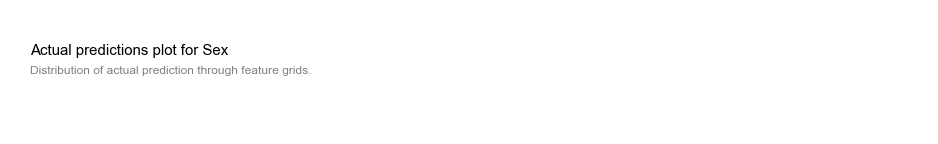

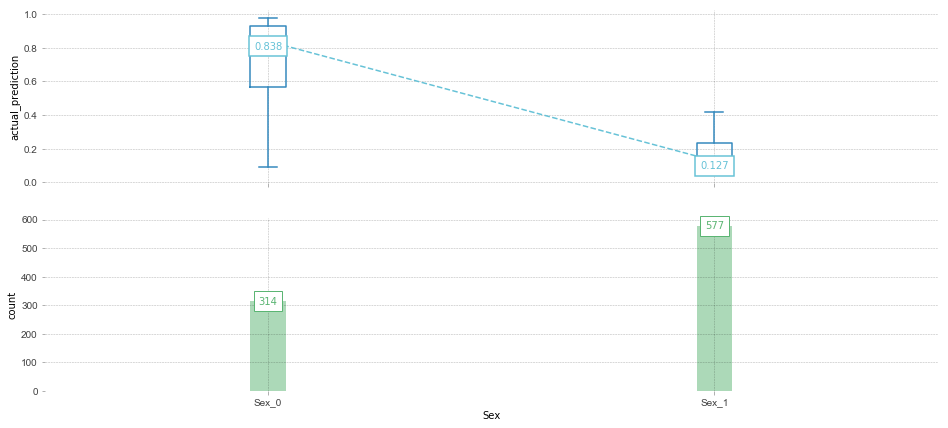

In [4]:
axes, df = actual_plot(model=titanic_model, X=titanic_data[titanic_features], feature='Sex', feature_name='Sex')

In [5]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,Sex_0,314,0.567416,0.838413,0.927985
1,1,Sex_1,577,0.102959,0.126992,0.230747


#### onehot encoding feature

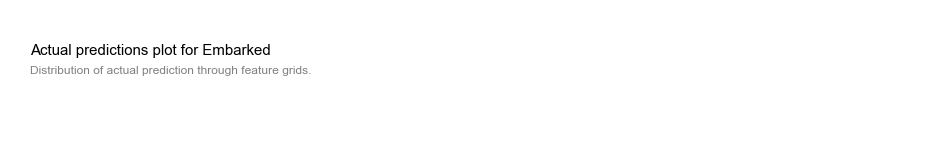

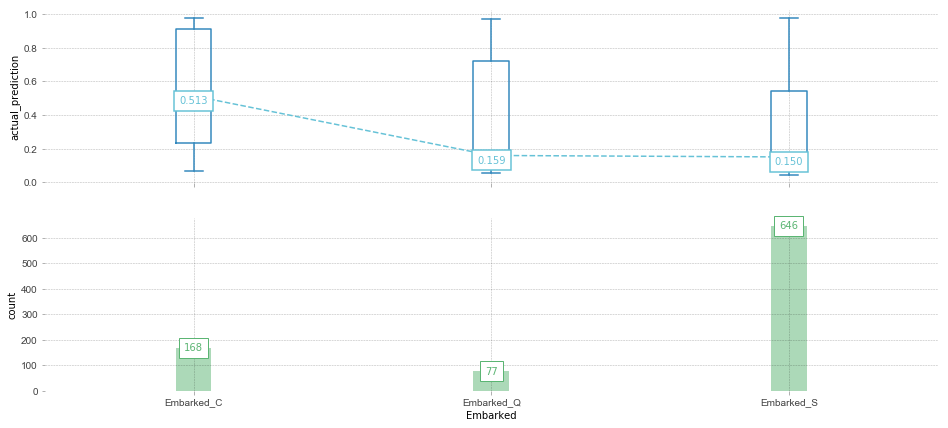

In [6]:
axes, df = actual_plot(model=titanic_model, X=titanic_data[titanic_features], 
                       feature=['Embarked_C', 'Embarked_Q', 'Embarked_S'], feature_name='Embarked')

In [7]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,Embarked_C,168,0.231351,0.513156,0.912702
1,1,Embarked_Q,77,0.115931,0.159242,0.720176
2,2,Embarked_S,646,0.109424,0.150355,0.545072


#### numeric feature

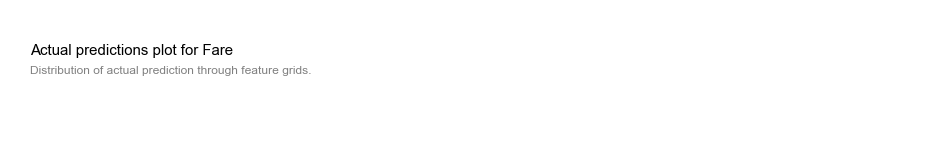

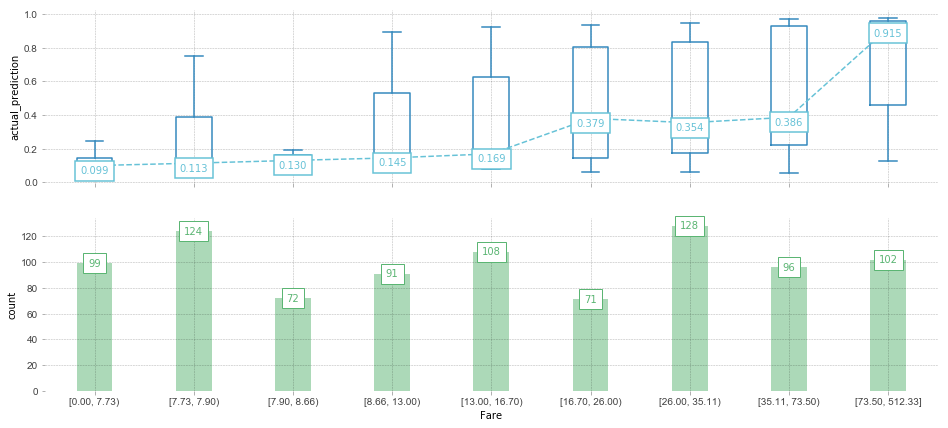

In [8]:
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=10, 
                       grid_type='percentile', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=False, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [9]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.00, 7.73)",99,0.069861,0.099070,0.142362
1,1,"[7.73, 7.90)",124,0.095364,0.113477,0.385146
2,2,"[7.90, 8.66)",72,0.116362,0.129820,0.160037
3,3,"[8.66, 13.00)",91,0.114593,0.144842,0.530937
4,4,"[13.00, 16.70)",108,0.122154,0.168968,0.626364
5,5,"[16.70, 26.00)",71,0.146319,0.379385,0.805452
6,6,"[26.00, 35.11)",128,0.175587,0.353853,0.835547
7,7,"[35.11, 73.50)",96,0.223087,0.386497,0.929101
8,8,"[73.50, 512.33]",102,0.460539,0.914678,0.959526


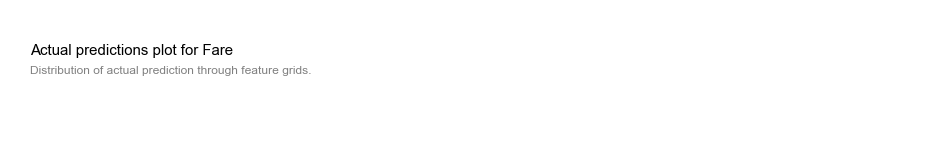

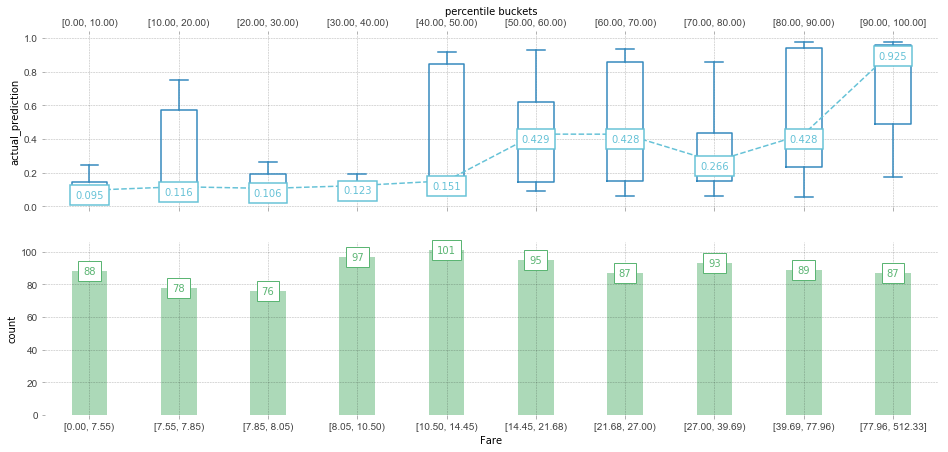

In [10]:
# show_percentile
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=11, 
                       grid_type='percentile', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=False, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [11]:
df

,x,display_column,percentile_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.00, 7.55)","[0.00, 10.00)",88,0.067758,0.095131,0.142362
1,1,"[7.55, 7.85)","[10.00, 20.00)",78,0.107916,0.115931,0.572496
2,2,"[7.85, 8.05)","[20.00, 30.00)",76,0.089044,0.105981,0.190063
3,3,"[8.05, 10.50)","[30.00, 40.00)",97,0.114259,0.122858,0.145616
4,4,"[10.50, 14.45)","[40.00, 50.00)",101,0.118867,0.151236,0.844558
5,5,"[14.45, 21.68)","[50.00, 60.00)",95,0.146742,0.428696,0.617728
6,6,"[21.68, 27.00)","[60.00, 70.00)",87,0.152368,0.428229,0.854590
7,7,"[27.00, 39.69)","[70.00, 80.00)",93,0.152634,0.266255,0.435452
8,8,"[39.69, 77.96)","[80.00, 90.00)",89,0.231419,0.428115,0.943079
9,9,"[77.96, 512.33]","[90.00, 100.00]",87,0.486477,0.924867,0.960674


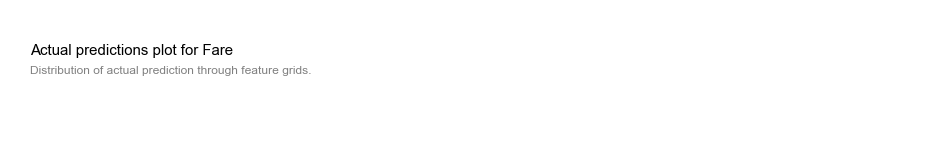

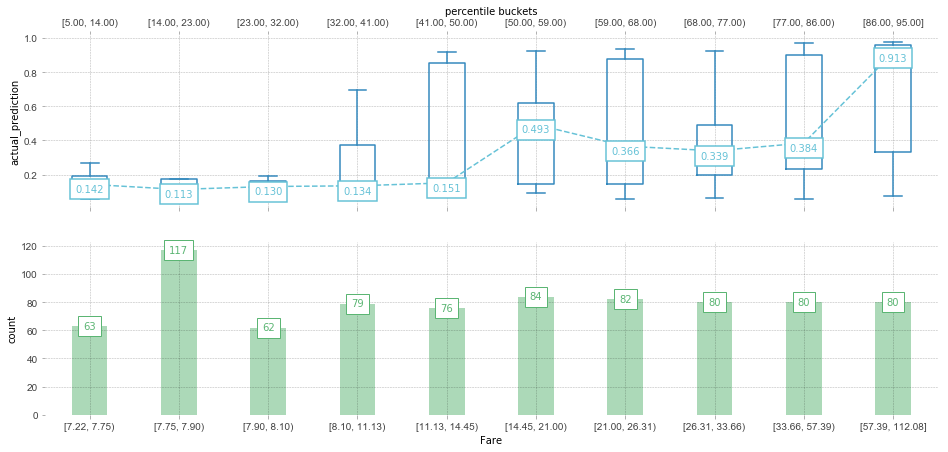

In [12]:
# percentile_range
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=11, 
                       grid_type='percentile', 
                       percentile_range=(5, 95), 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=False, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

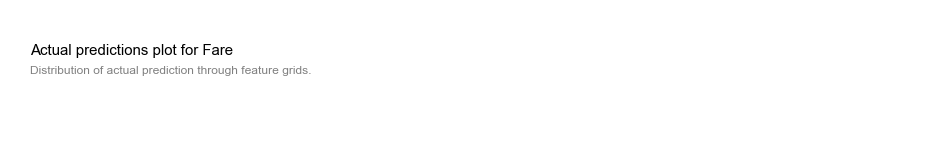

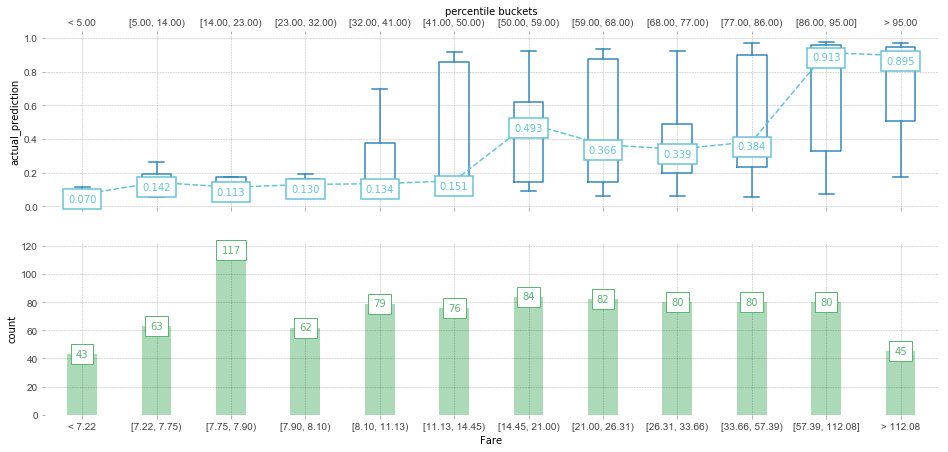

In [13]:
# show_outliers
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=11, 
                       grid_type='percentile', 
                       percentile_range=(5, 95), 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=True, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [14]:
df

,x,display_column,percentile_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,< 7.22,< 5.00,43,0.064330,0.069893,0.094040
1,1,"[7.22, 7.75)","[5.00, 14.00)",63,0.103244,0.142362,0.190563
2,2,"[7.75, 7.90)","[14.00, 23.00)",117,0.093493,0.112673,0.171133
3,3,"[7.90, 8.10)","[23.00, 32.00)",62,0.116362,0.129820,0.159373
4,4,"[8.10, 11.13)","[32.00, 41.00)",79,0.114593,0.133925,0.375276
5,5,"[11.13, 14.45)","[41.00, 50.00)",76,0.120145,0.151236,0.854452
6,6,"[14.45, 21.00)","[50.00, 59.00)",84,0.142901,0.492737,0.616895
7,7,"[21.00, 26.31)","[59.00, 68.00)",82,0.146425,0.366233,0.873828
8,8,"[26.31, 33.66)","[68.00, 77.00)",80,0.199183,0.338785,0.488096
9,9,"[33.66, 57.39)","[77.00, 86.00)",80,0.233874,0.384470,0.898784


In [15]:
df['count'].sum()

891

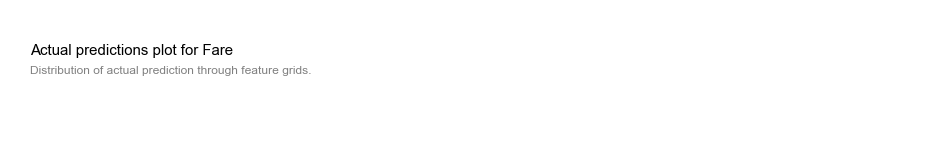

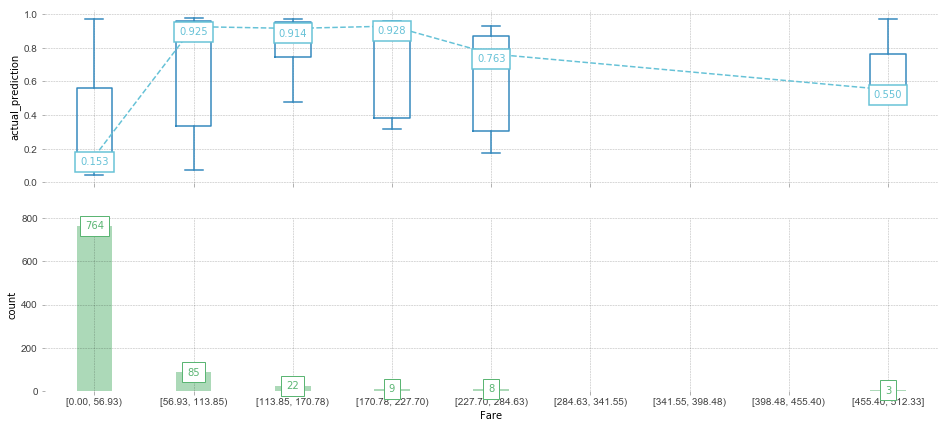

In [16]:
# grid_type
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=False, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [17]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.00, 56.93)",764.0,0.112547,0.152834,0.563078
1,1,"[56.93, 113.85)",85.0,0.333701,0.924867,0.959883
2,2,"[113.85, 170.78)",22.0,0.746612,0.914252,0.952032
3,3,"[170.78, 227.70)",9.0,0.381390,0.928236,0.936056
4,4,"[227.70, 284.63)",8.0,0.302980,0.762882,0.870700
5,5,"[284.63, 341.55)",0.0,0.000000,0.000000,0.000000
6,6,"[341.55, 398.48)",0.0,0.000000,0.000000,0.000000
7,7,"[398.48, 455.40)",0.0,0.000000,0.000000,0.000000
8,8,"[455.40, 512.33]",3.0,0.529476,0.549700,0.759922


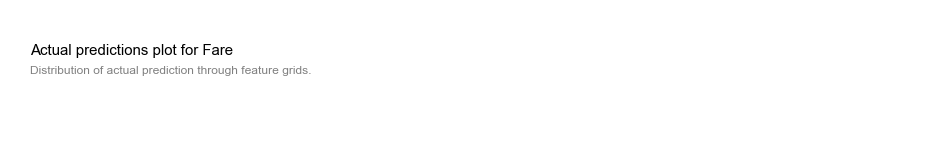

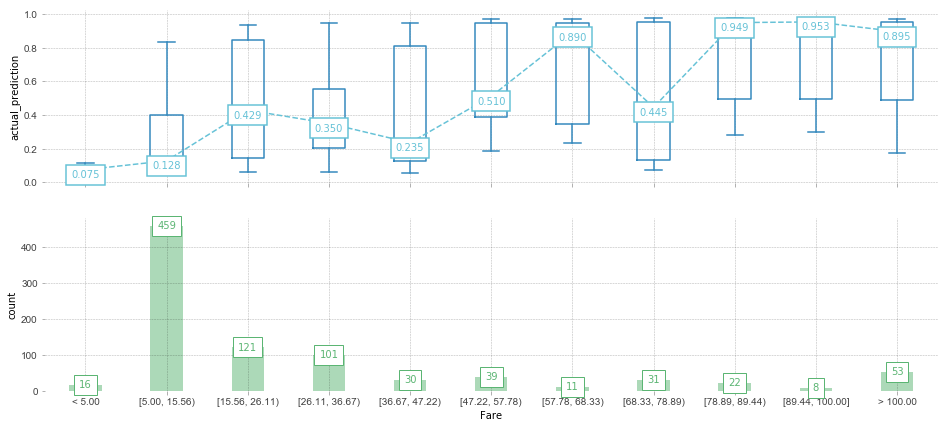

In [18]:
# grid_range and show_outliers
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=(5, 100), 
                       cust_grid_points=None, 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [19]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,< 5.00,16,0.064330,0.074599,0.098426
1,1,"[5.00, 15.56)",459,0.104625,0.127567,0.399861
2,2,"[15.56, 26.11)",121,0.144498,0.428696,0.846010
3,3,"[26.11, 36.67)",101,0.205825,0.349701,0.555512
4,4,"[36.67, 47.22)",30,0.126614,0.234665,0.810708
5,5,"[47.22, 57.78)",39,0.386497,0.510488,0.948016
6,6,"[57.78, 68.33)",11,0.346241,0.890045,0.946090
7,7,"[68.33, 78.89)",31,0.134603,0.445353,0.952058
8,8,"[78.89, 89.44)",22,0.494782,0.948838,0.964170
9,9,"[89.44, 100.00]",8,0.494685,0.953014,0.966605


In [20]:
df['count'].sum()

891

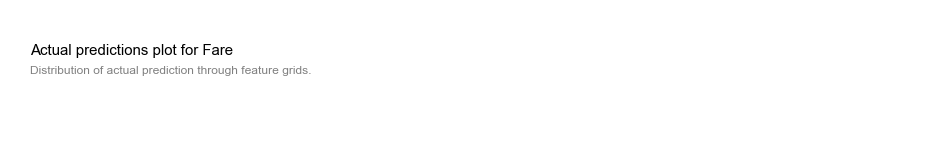

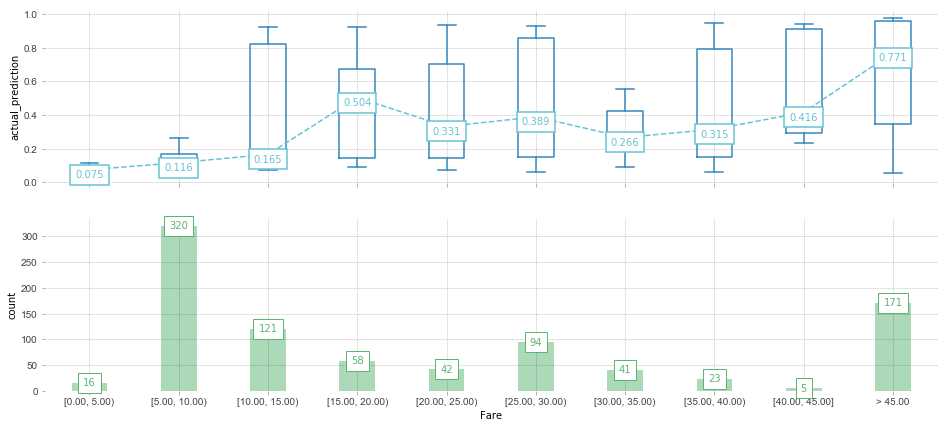

In [21]:
# cust_grid_points and show_outliers
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=range(0, 50, 5), 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=None, 
                       plot_params=None)

In [22]:
df

,x,display_column,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.00, 5.00)",16,0.064330,0.074599,0.098426
1,1,"[5.00, 10.00)",320,0.098797,0.116362,0.165713
2,2,"[10.00, 15.00)",121,0.118867,0.165406,0.823001
3,3,"[15.00, 20.00)",58,0.145409,0.503603,0.674061
4,4,"[20.00, 25.00)",42,0.145059,0.331427,0.701415
5,5,"[25.00, 30.00)",94,0.152686,0.388850,0.854998
6,6,"[30.00, 35.00)",41,0.201720,0.266255,0.423798
7,7,"[35.00, 40.00)",23,0.152467,0.314967,0.789044
8,8,"[40.00, 45.00]",5,0.294660,0.415507,0.909864
9,9,> 45.00,171,0.345901,0.770683,0.956104


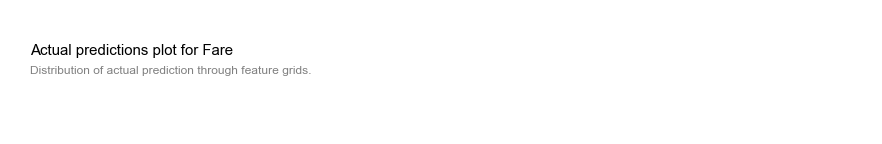

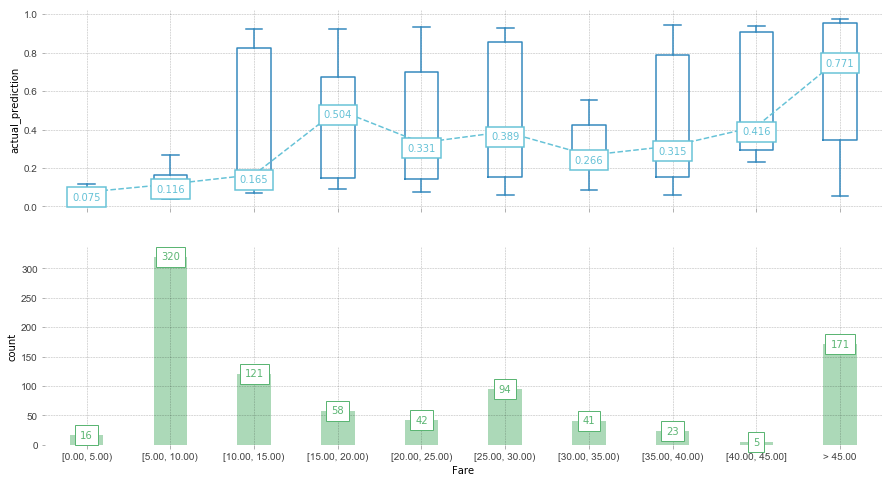

In [23]:
# figsize
axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=range(0, 50, 5), 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=(15, 8), 
                       plot_params=None)

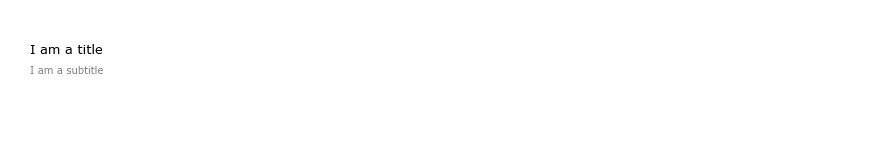

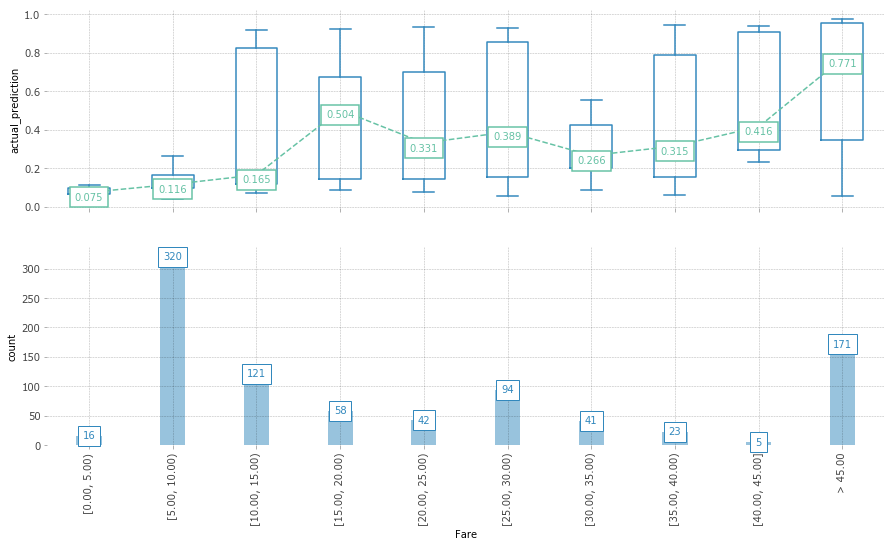

In [24]:
# plot_params
plot_params = {
    'font_family': 'Verdana',
    'xticks_rotation': 90,
    'title': 'I am a title',
    'subtitle': 'I am a subtitle',
    'title_fontsize': 13,
    'subtitle_fontsize': 10,
    'box_line_width': 1.5,
    'box_line_color': '#66c2a5',
    'box_color': '#3288bd',
    'box_width': 0.5,
    'bar_color': '#3288bd',
    'bar_width': 0.3
}

axes, df = actual_plot(model=titanic_model, 
                       X=titanic_data[titanic_features], 
                       feature='Fare', 
                       feature_name='Fare', 
                       num_grid_points=10, 
                       grid_type='equal', 
                       percentile_range=None, 
                       grid_range=None, 
                       cust_grid_points=range(0, 50, 5), 
                       show_percentile=False, 
                       show_outliers=True, 
                       which_classes=None, 
                       predict_kwds={}, 
                       ncols=2, 
                       figsize=(15, 8), 
                       plot_params=plot_params)